In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')
diamondsOG = pd.read_csv('diamonds_original.csv')

In [ ]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [ ]:
diamondsOG

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [ ]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [ ]:
X = diamonds[feature_names]
y = diamonds['class']

In [ ]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [ ]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
all_predictions = []
accuracy_scores = []

***

Pomocne funkcije za izvestaj o modelu

In [1]:
def feature_importance(pipeline):
  model = pipeline.named_steps['model']
  feature_percentages = [num*100 for num in model.feature_importances_]
  for i in range(len(feature_names)):
    print(f'{feature_names[i]} : {feature_percentages[i]}')

  plt.figure(figsize=(8,8))
  pd.Series(feature_percentages, index=feature_names).plot.barh(grid=True)
  plt.xlabel('(%)')
  plt.title('Znacajnost atributa')
  plt.show()

def model_report(pipeline, X_test, y_test):
  y_pred = pipeline.predict(X_test)
  model = pipeline['model']
  accuracy = accuracy_score(y_test, y_pred)
  all_predictions.append(y_pred)
  accuracy_scores.append(accuracy)

  print(f'Izvestaj o {type(model).__name__} modelu:')
  print('-------------------------------------------------------------------')
  print(f'Klase za predvidjanje: {price_classes}')
  print(f'Accuracy: {accuracy}')
  print('-------------------------------------------------------------------')
  print('Klasifikacioni izvestaj: ')
  print(classification_report(y_test, y_pred))
  print('-------------------------------------------------------------------')
  print('Matrica konfuzije: ')
  data = confusion_matrix(y_test, y_pred)
  _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=model.classes_, yticklabels=model.classes_, cmap = plt.cm.Reds)



## DecisionTreeClassifier

S obzirom na neuravnotezenost klasa napravicemo *class_weights* niz sa tezinama klasa da bismo ih izbalansirali

In [ ]:
class_percentages = [73.2, 17.7, 6.4, 2.6]
class_weights = {}
for i in range(4):
  class_weights[price_classes[i]] = (100 / class_percentages[i])

class_weights

{'[0, 5000]': 1.366120218579235,
 '(5000, 10000]': 5.649717514124294,
 '(10000, 15000]': 15.625,
 '15000+': 38.46153846153846}

In [ ]:
dtc = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42, class_weight=class_weights))
])

In [ ]:
dtc.fit(X_train, y_train)

Pipeline(steps=[('model',
                 DecisionTreeClassifier(class_weight={'(10000, 15000]': 15.625,
                                                      '(5000, 10000]': 5.649717514124294,
                                                      '15000+': 38.46153846153846,
                                                      '[0, 5000]': 1.366120218579235},
                                        random_state=42))])

Izvestaj o DecisionTreeClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9347729154723231
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.76      0.78      0.77      1018
 (5000, 10000]       0.85      0.85      0.85      2802
        15000+       0.80      0.74      0.77       409
     [0, 5000]       0.98      0.98      0.98     11470

      accuracy                           0.93     15699
     macro avg       0.85      0.84      0.84     15699
  weighted avg       0.93      0.93      0.93     15699

-------------------------------------------------------------------
Matrica konfuzije: 


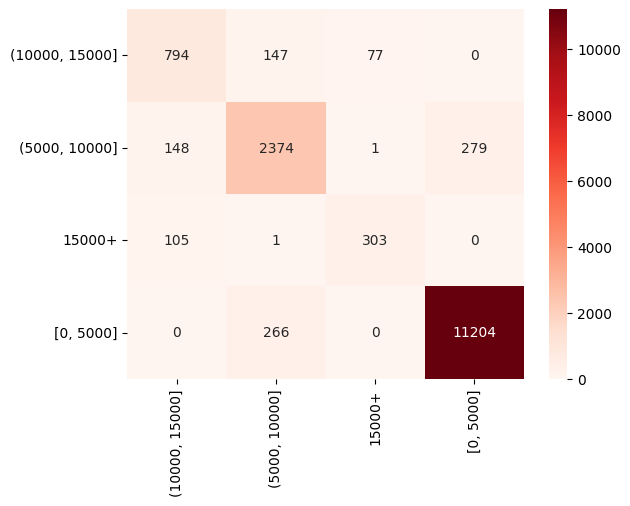

In [ ]:
model_report(dtc, X_test, y_test)

carat : 0.3234925354895227
clarity : 0.13514540088863425
color : 0.1117999468147758
cut : 0.012996646713201873
depth : 0.030132534180134868
table : 0.020632043474779815
x : 0.02393369895547562
y : 0.1936137622301327
z : 0.028432144521850482
volume : 0.11982128673149194


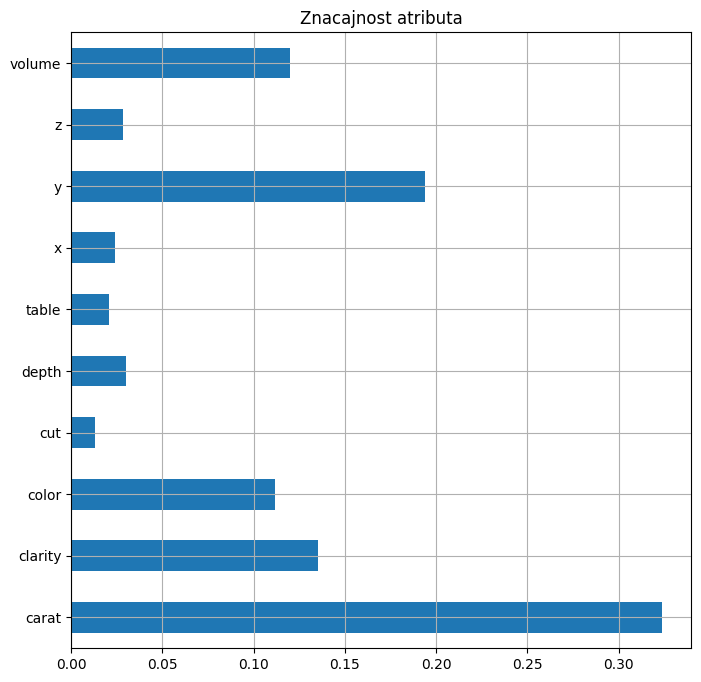

In [ ]:
feature_importance(dtc)

#### Hyperparameter tuning

In [ ]:
params = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [5, 10, 15, 20, 25, 30, 35, 40]
}

In [ ]:
grid = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END model__criterion=gini, model__max_depth=5;, score=0.885 total time=   0.1s
[CV 2/3] END model__criterion=gini, model__max_depth=5;, score=0.853 total time=   0.1s
[CV 3/3] END model__criterion=gini, model__max_depth=5;, score=0.891 total time=   0.1s
[CV 1/3] END model__criterion=gini, model__max_depth=10;, score=0.929 total time=   0.1s
[CV 2/3] END model__criterion=gini, model__max_depth=10;, score=0.926 total time=   0.1s
[CV 3/3] END model__criterion=gini, model__max_depth=10;, score=0.928 total time=   0.1s
[CV 1/3] END model__criterion=gini, model__max_depth=15;, score=0.932 total time=   0.2s
[CV 2/3] END model__criterion=gini, model__max_depth=15;, score=0.935 total time=   0.1s
[CV 3/3] END model__criterion=gini, model__max_depth=15;, score=0.933 total time=   0.2s
[CV 1/3] END model__criterion=gini, model__max_depth=20;, score=0.929 total time=   0.2s
[CV 2/3] END model__criterion=gini, model__max_depth

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(class_weight={'(10000, 15000]': 15.625,
                                                                             '(5000, 10000]': 5.649717514124294,
                                                                             '15000+': 38.46153846153846,
                                                                             '[0, 5000]': 1.366120218579235},
                                                               random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [5, 10, 15, 20, 25, 30, 35, 40]},
             scoring='accuracy', verbose=4)

In [ ]:
grid.best_params_

{'model__criterion': 'gini', 'model__max_depth': 15}

In [ ]:
dtc_cv = grid.best_estimator_

Izvestaj o DecisionTreeClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.936811261863813
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.77      0.79      0.78      1018
 (5000, 10000]       0.83      0.88      0.86      2802
        15000+       0.77      0.85      0.81       409
     [0, 5000]       0.99      0.97      0.98     11470

      accuracy                           0.94     15699
     macro avg       0.84      0.87      0.85     15699
  weighted avg       0.94      0.94      0.94     15699

-------------------------------------------------------------------
Matrica konfuzije: 


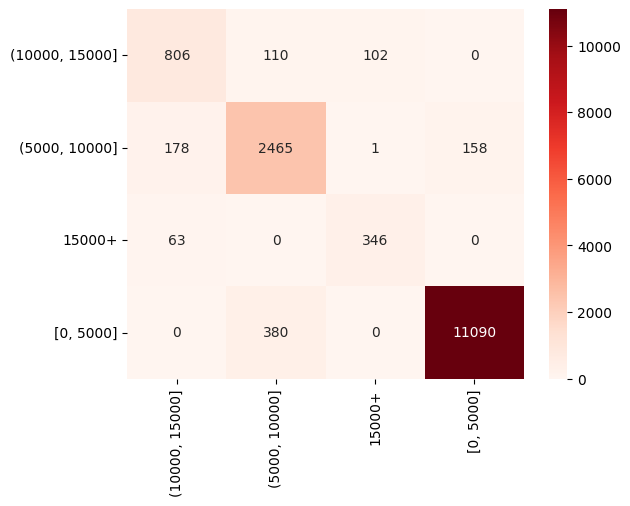

In [ ]:
model_report(dtc_cv, X_test, y_test)

carat : 0.335733691525051
clarity : 0.14221001966894078
color : 0.1163195720198345
cut : 0.012243414803616758
depth : 0.026317240599934618
table : 0.015089585354077565
x : 0.018044540593927696
y : 0.1948199327694283
z : 0.022758446359419128
volume : 0.11646355630576956


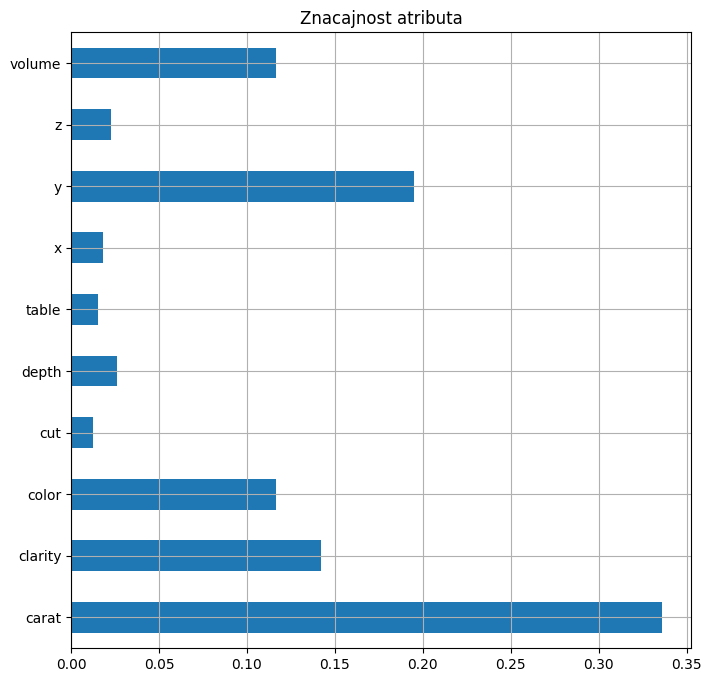

In [ ]:
feature_importance(dtc_cv)

***

### Now with PCA

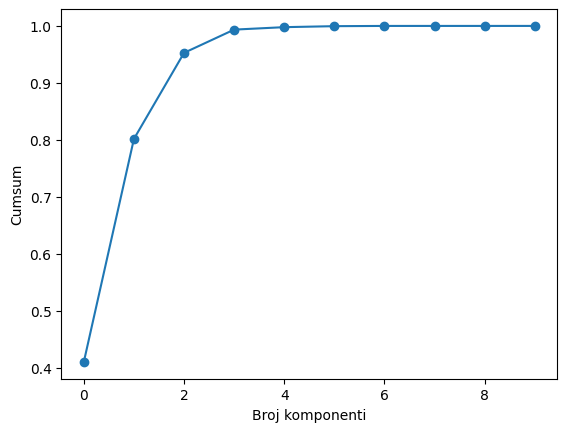

In [ ]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.ylabel('Cumsum')
plt.show()

In [ ]:
dtc_pca = Pipeline([
    ('pca', PCA()),
    ('model', DecisionTreeClassifier(random_state = 42, class_weight = class_weights) )
])

In [ ]:
params = {
    'pca__n_components' : [2, 3, 4],
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : [5, 10, 15, 20, 25, 30, 35, 40]
}

In [ ]:
grid = GridSearchCV(dtc_pca, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END model__criterion=gini, model__max_depth=5, pca__n_components=2;, score=0.504 total time=   0.2s
[CV 2/3] END model__criterion=gini, model__max_depth=5, pca__n_components=2;, score=0.505 total time=   0.3s
[CV 3/3] END model__criterion=gini, model__max_depth=5, pca__n_components=2;, score=0.494 total time=   0.3s
[CV 1/3] END model__criterion=gini, model__max_depth=5, pca__n_components=3;, score=0.476 total time=   0.3s
[CV 2/3] END model__criterion=gini, model__max_depth=5, pca__n_components=3;, score=0.505 total time=   0.3s
[CV 3/3] END model__criterion=gini, model__max_depth=5, pca__n_components=3;, score=0.417 total time=   0.3s
[CV 1/3] END model__criterion=gini, model__max_depth=5, pca__n_components=4;, score=0.907 total time=   0.3s
[CV 2/3] END model__criterion=gini, model__max_depth=5, pca__n_components=4;, score=0.906 total time=   0.3s
[CV 3/3] END model__criterion=gini, model__max_depth=5, pca__n_com

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model',
                                        DecisionTreeClassifier(class_weight={'(10000, 15000]': 15.625,
                                                                             '(5000, 10000]': 5.649717514124294,
                                                                             '15000+': 38.46153846153846,
                                                                             '[0, 5000]': 1.366120218579235},
                                                               random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy', verbose=4)

In [ ]:
grid.best_params_

{'model__criterion': 'gini', 'model__max_depth': 15, 'pca__n_components': 4}

In [ ]:
dtc_pca_cv = grid.best_estimator_

Izvestaj o DecisionTreeClassifier modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9424167144404102
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.78      0.83      0.80      1018
 (5000, 10000]       0.86      0.89      0.87      2802
        15000+       0.75      0.82      0.79       409
     [0, 5000]       0.99      0.97      0.98     11470

      accuracy                           0.94     15699
     macro avg       0.84      0.88      0.86     15699
  weighted avg       0.94      0.94      0.94     15699

-------------------------------------------------------------------
Matrica konfuzije: 


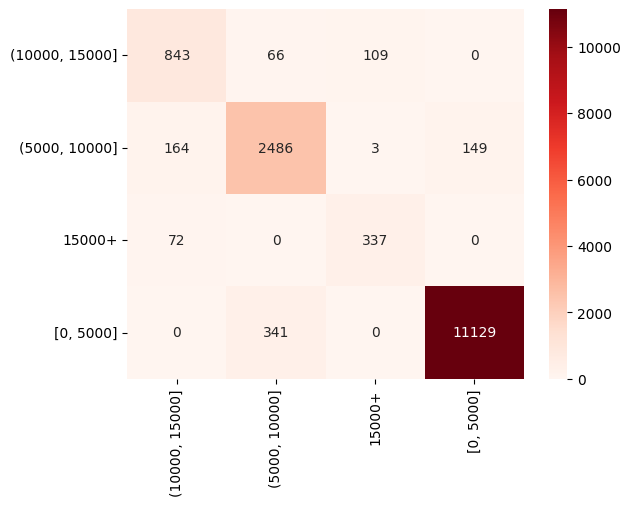

In [ ]:
model_report(dtc_pca_cv, X_test, y_test)

***

## Results:

In [ ]:
model_names = ['dtc', 'dtc_cv', 'dtc_pca_cv']

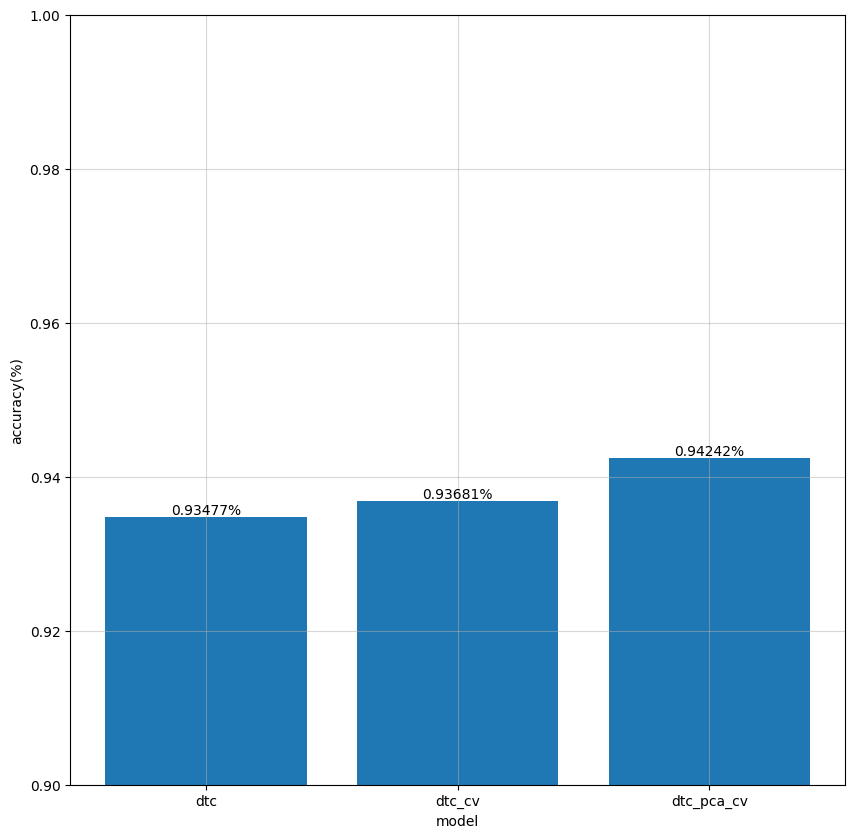

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
plt.ylim(0.9, 1.0)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('model')
plt.ylabel('accuracy(%)')
plt.show()

S obzirom na rezultate, izabracemo **dtc_pca_cv** kao predstavnika **DecisionTree**

In [ ]:
joblib.dump(dtc_pca_cv, 'DTC.pkl')

['DTC.pkl']